Import Libraries

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import itertools

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import KElbowVisualizer

import plotly.io as pio
pio.renderers
pio.renderers.default = "browser"

import Preprocess as pp
import Viz as viz

np.set_printoptions(precision = 3)

Set defaults

In [2]:
RANDOM_STATE = 42

df_scaled_full, df_scaled_isCOVID, df_scaled_notCOVID = pp.preprocessData()

['assessed_building_value', 'story_height', 'heated_area', 'bath', 'bath_fixtures', 'mort_rate', 'unemploy_rate', 'pop_growth_rate', 'covid_cases', 'lumber_price', 'metals_price', 'build_price', 'int_rate', 'supply', 'demand', 'year', 'crime', 'electric', 'gas', 'water', 'sewer', 'all', 'isCovid', 'physical_city_codes', 'planning_jurisdiction_codes', 'physical_zip_code_codes']


In [3]:
#samples for running Silhouette Score to shortern processing time
sample_full = pd.DataFrame(df_scaled_full).sample(frac=0.2, replace=False, random_state=RANDOM_STATE).reset_index().drop(columns=['index'])
sample_isCOVID = pd.DataFrame(df_scaled_full).sample(frac=0.2, replace=False, random_state=RANDOM_STATE).reset_index().drop(columns=['index'])
sample_notCOVID = pd.DataFrame(df_scaled_full).sample(frac=0.2, replace=False, random_state=RANDOM_STATE).reset_index().drop(columns=['index'])


K-Means Clustering

Elbow Method

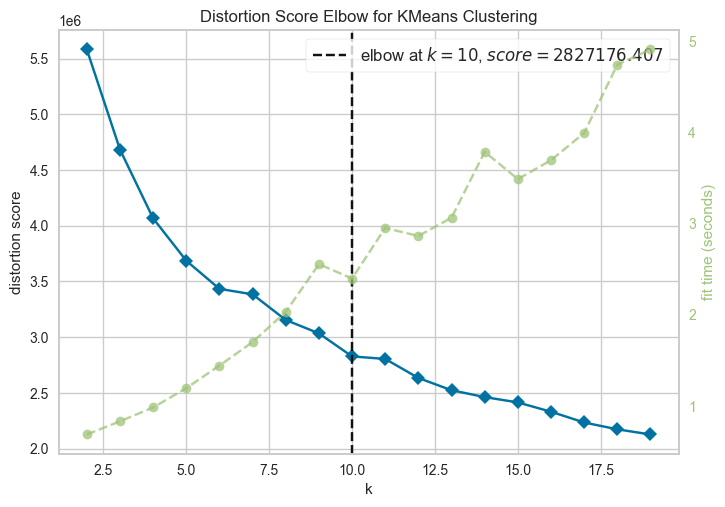

In [4]:
# initiate kmeans instance
kmeans = KMeans(init='k-means++', random_state=RANDOM_STATE)

# show results for full dataset
elb_visualizer = KElbowVisualizer(kmeans, k=(2,20)).fit(df_scaled_full).show()  

Silhouette Score

For n_clusters = 8 The average silhouette_score is : 0.19081646755179688
For n_clusters = 9 The average silhouette_score is : 0.20000128014948473
For n_clusters = 10 The average silhouette_score is : 0.23709696282221834
For n_clusters = 11 The average silhouette_score is : 0.24109631276480287
For n_clusters = 12 The average silhouette_score is : 0.20950669453636125
For n_clusters = 13 The average silhouette_score is : 0.233161509191984
For n_clusters = 14 The average silhouette_score is : 0.23024645367043767


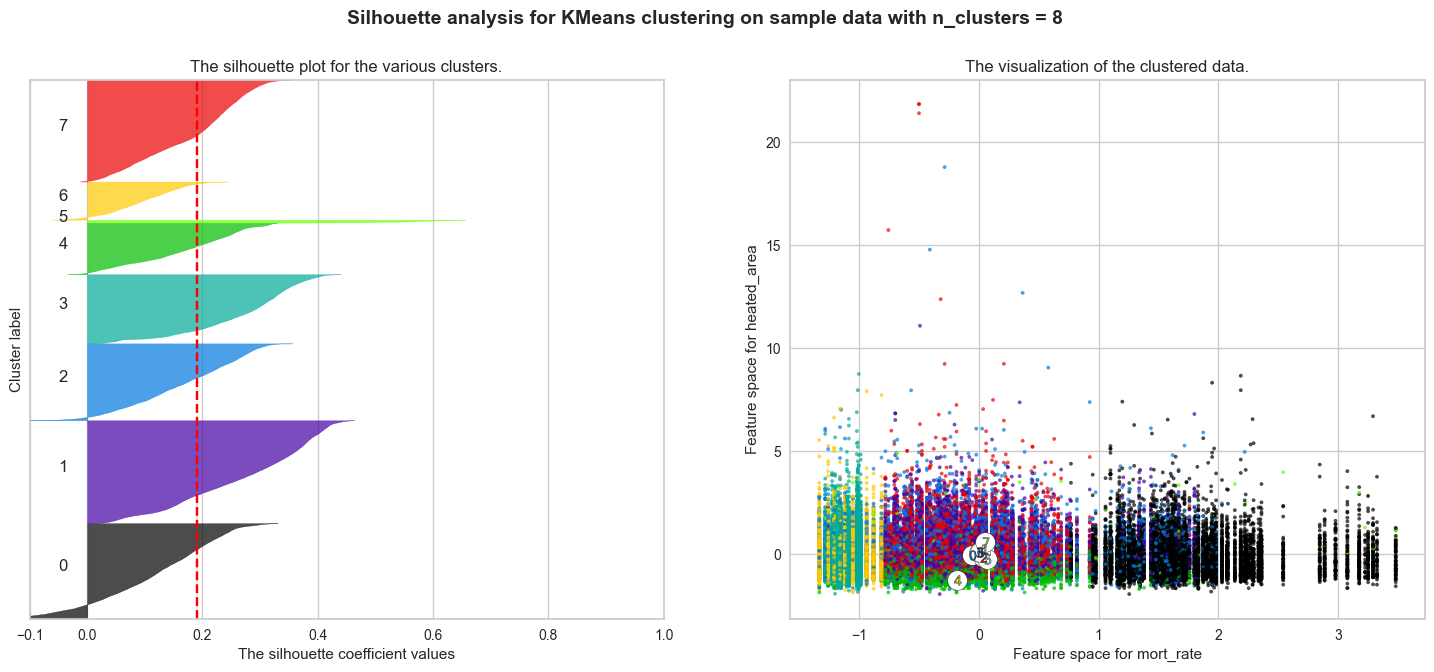

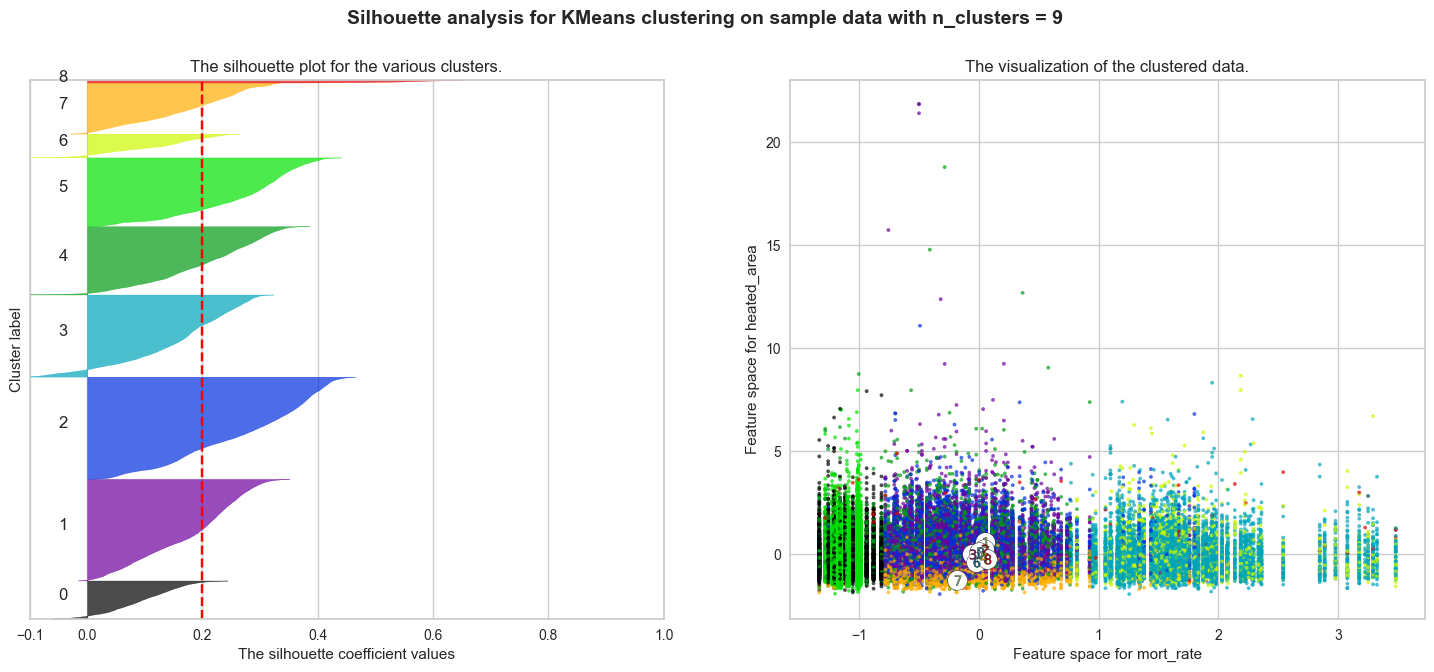

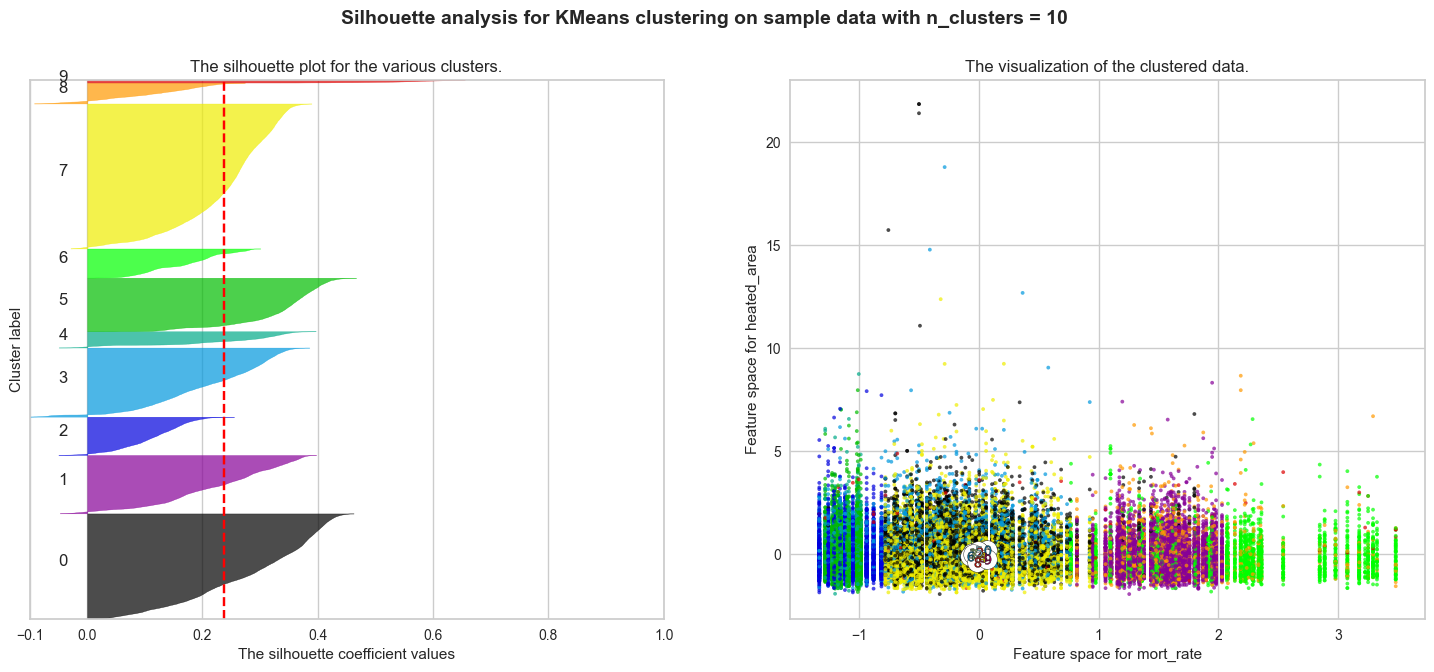

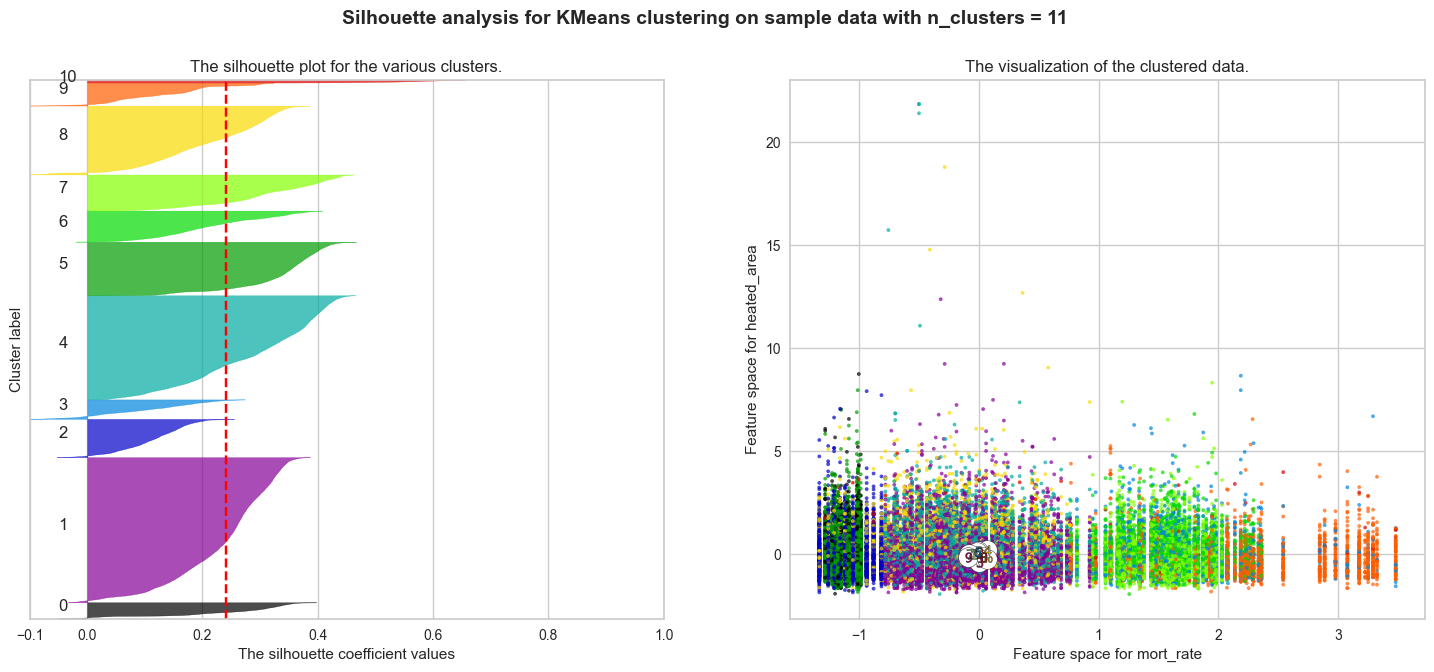

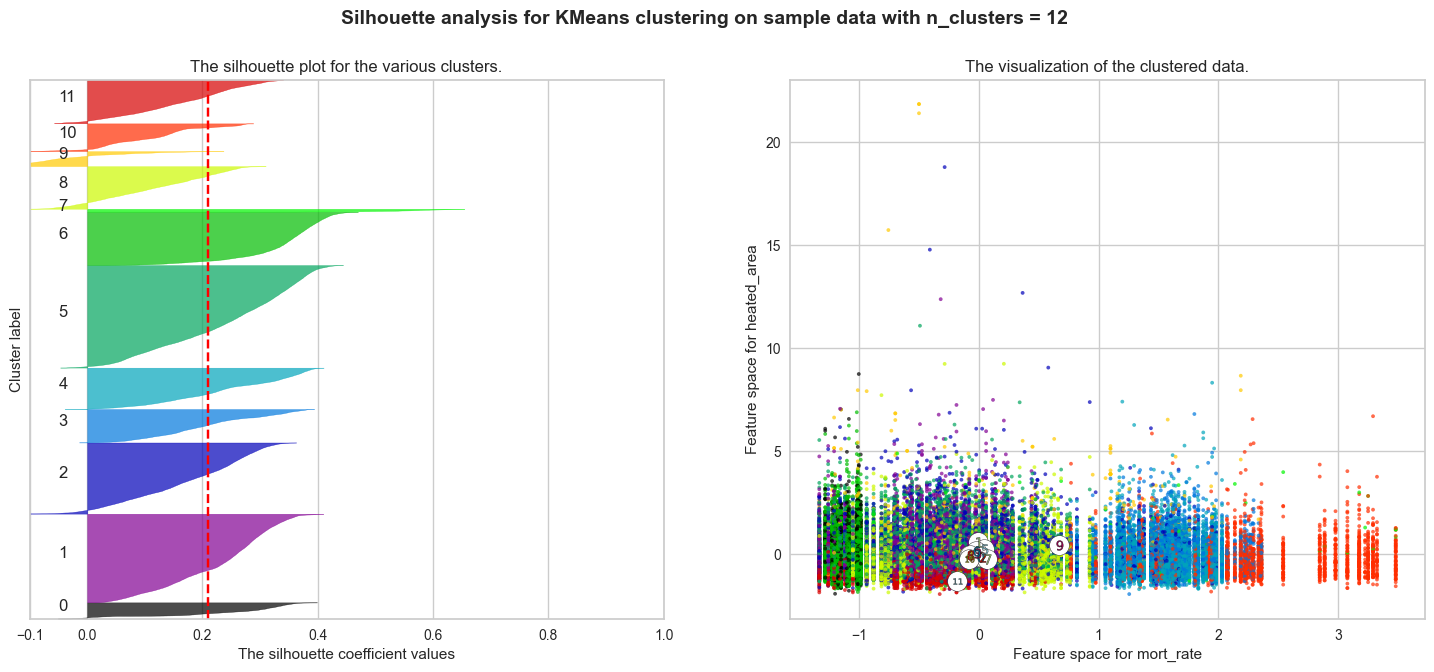

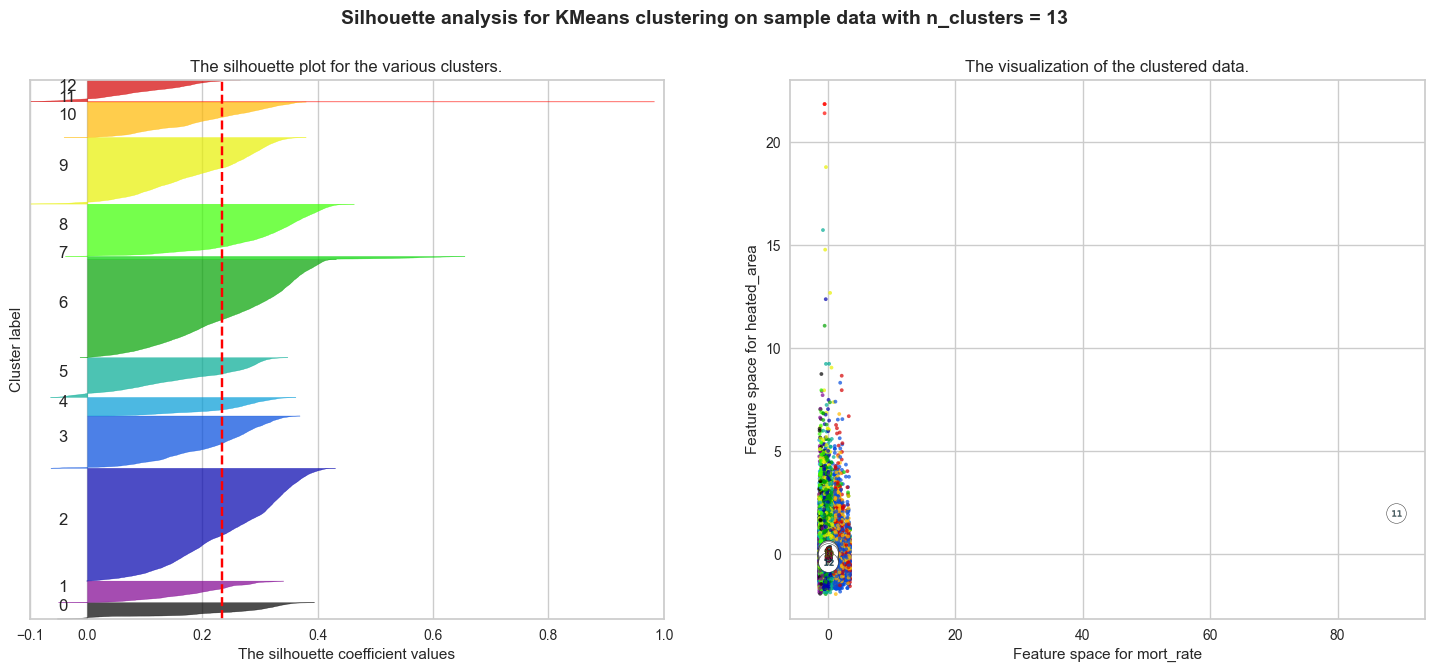

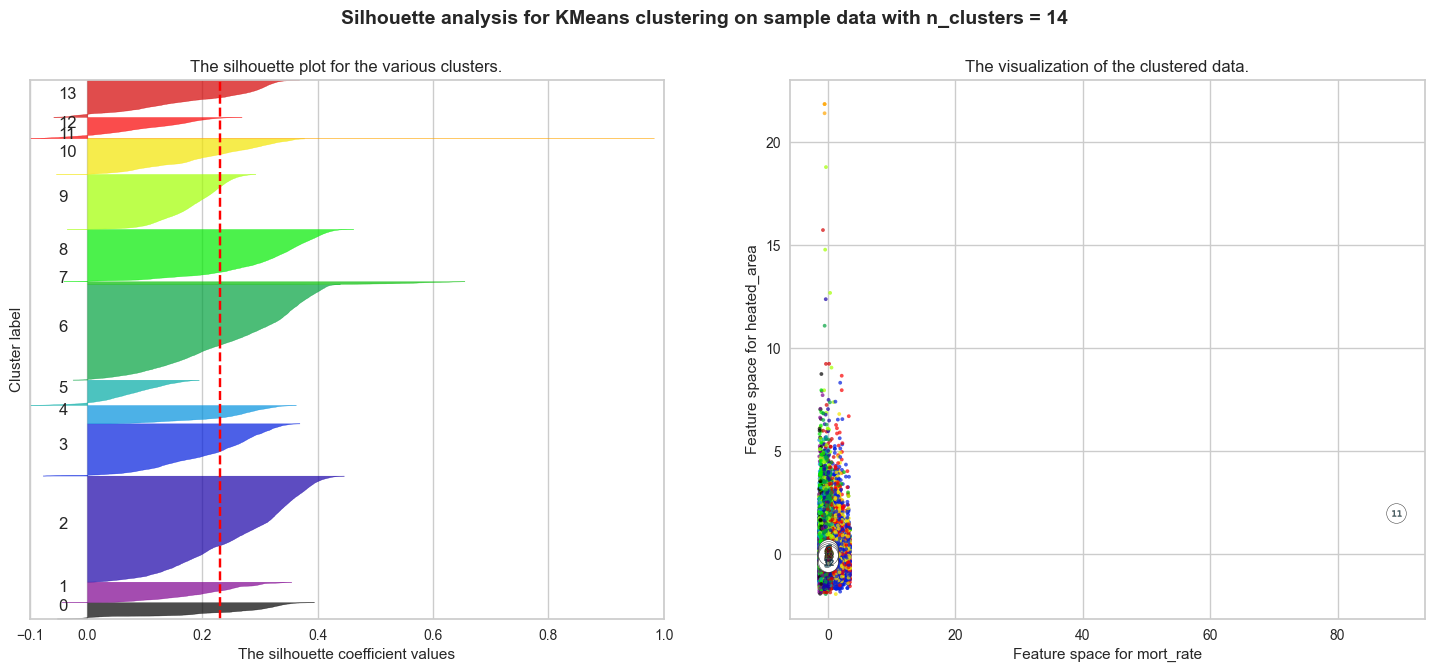

In [6]:
range_n_clusters = [8, 9, 10, 11, 12, 13, 14]
ax = 'mort_rate'
ay = 'heated_area'

viz.draw_silhouette(X=sample_full, k=range_n_clusters, ax=ax, ay=ay, random_state=RANDOM_STATE)

Overlaying Clusters on Scaled Data

In [1]:
selected_k=10

viz.draw_cluster_scatter(X=sample_full, k=selected_k, random_state=RANDOM_STATE)



NameError: name 'viz' is not defined